In [232]:
import pandas as pd
import numpy as np
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from pprint import pprint
csvpath = "master_dataset_walkscore_bikescore.csv"
df = pd.read_csv(csvpath)

In [233]:
West = ["WA", "OR", "CA", "NV", "ID", "UT", "AZ", "NM", "CO", "WY", "MT","HI","AK"]
Midwest = ["ND", "SD", "NE", "KS","MN", "IA", "MO", "WI", "IL","IN","MI","OH"]
East = ["ME","VT","NH","MA","NY", "RI", "CT","NJ","PA","DE", "MD","WV","VA"]
South = ["KY","TN","NC","SC","GA","AL","FL","MS","AR","LA","OK","TX"]

In [234]:
df = df.drop(["Column 1"], axis = 1)

In [235]:
df
Region = pd.get_dummies(df["state_name 2"], drop_first = True)
df = pd.concat([df,Region],axis=1)

In [236]:
new_df = df.drop(["price_tag",
                  "zip_code", "name", "storeid",
                  "city_name", "state_name", "state_name 2"],axis=1)

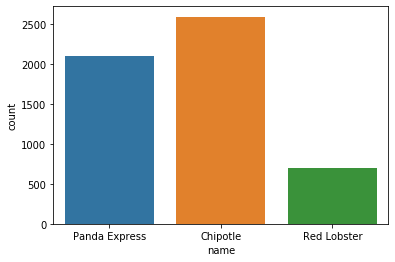

In [237]:
sns.countplot(x="name", data= df)

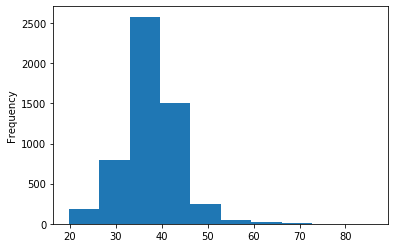

In [238]:
df["Median Age"].plot.hist()

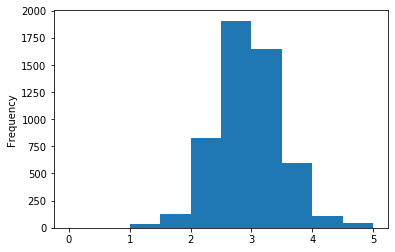

In [239]:
df["yelp_rating"].plot.hist()

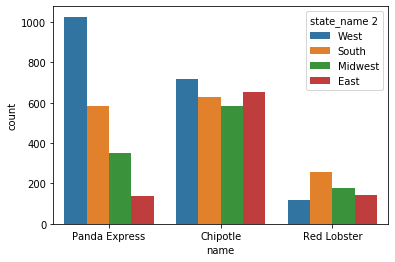

In [240]:
sns.countplot(x="name", hue="state_name 2", data=df)

In [241]:
new_df2 = new_df.dropna()
new_df2

,yelp_rating,review_count,lat,lng,name 2,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Unemployment,Walk Score,Bike Score,Midwest,South,West
0,2.0,41.0,34.145200,-118.259400,1,689,35.2,159500,93135,188,21,90,63.0,0,0,1
1,2.0,25.0,34.145100,-118.258900,1,689,35.2,159500,93135,188,21,88,63.0,0,0,1
2,2.0,117.0,34.145146,-118.259298,0,689,35.2,159500,93135,188,21,90,63.0,0,0,1
3,3.5,58.0,33.955900,-84.131800,1,67959,35.1,53514,28011,8901,1677,58,46.0,0,1,0
4,3.0,126.0,33.955240,-84.131099,0,67959,35.1,53514,28011,8901,1677,56,40.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,2.5,51.0,46.613916,-120.511168,2,32204,30.4,40437,18216,8257,852,61,54.0,0,0,1
5377,3.0,21.0,38.423513,-82.442233,2,20875,40.2,36022,28529,5226,498,77,80.0,0,0,0
5378,3.0,19.0,39.297170,-81.547218,2,30158,39.7,34259,21225,7717,1019,52,30.0,0,0,0
5379,2.5,74.0,42.960442,-88.008841,2,25879,41.1,53328,31331,2836,374,66,48.0,1,0,0


In [242]:
### Train Data
X= new_df2.drop("name 2",axis=1)
y = new_df2["name 2"]
X

,yelp_rating,review_count,lat,lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Unemployment,Walk Score,Bike Score,Midwest,South,West
0,2.0,41.0,34.145200,-118.259400,689,35.2,159500,93135,188,21,90,63.0,0,0,1
1,2.0,25.0,34.145100,-118.258900,689,35.2,159500,93135,188,21,88,63.0,0,0,1
2,2.0,117.0,34.145146,-118.259298,689,35.2,159500,93135,188,21,90,63.0,0,0,1
3,3.5,58.0,33.955900,-84.131800,67959,35.1,53514,28011,8901,1677,58,46.0,0,1,0
4,3.0,126.0,33.955240,-84.131099,67959,35.1,53514,28011,8901,1677,56,40.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,2.5,51.0,46.613916,-120.511168,32204,30.4,40437,18216,8257,852,61,54.0,0,0,1
5377,3.0,21.0,38.423513,-82.442233,20875,40.2,36022,28529,5226,498,77,80.0,0,0,0
5378,3.0,19.0,39.297170,-81.547218,30158,39.7,34259,21225,7717,1019,52,30.0,0,0,0
5379,2.5,74.0,42.960442,-88.008841,25879,41.1,53328,31331,2836,374,66,48.0,1,0,0


In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
logmodel = LogisticRegression()

In [247]:
logmodel.fit(X_train, y_train)

C:\Users\totor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\totor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
predictions  = logmodel.predict(X_test)

In [249]:
from sklearn.metrics import classification_report

In [250]:
pprint(classification_report(y_test,predictions))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.64      0.74      0.69       888\n'
 '           1       0.62      0.66      0.64       639\n'
 '           2       0.54      0.10      0.17       215\n'
 '\n'
 '    accuracy                           0.63      1742\n'
 '   macro avg       0.60      0.50      0.50      1742\n'
 'weighted avg       0.62      0.63      0.60      1742\n')


In [251]:
from sklearn.metrics import confusion_matrix

In [252]:
confusion_matrix(y_test,predictions)

array([[659, 217,  12],
       [214, 419,   6],
       [158,  36,  21]], dtype=int64)

In [253]:
from sklearn.metrics import accuracy_score

In [254]:
accuracy_score(y_test,predictions)

0.6308840413318025

In [255]:
from sklearn.utils import shuffle
y_test_shuf = shuffle(y_test)

In [256]:
accuracy_score(y_test_shuf,predictions)

0.447187141216992

In [257]:
logmodel.coef_

array([[ 3.39090250e-03,  5.45554204e-03,  2.39510011e-02,
         3.84429691e-02, -9.97507668e-06,  8.59119226e-03,
         8.64368252e-06,  6.99918413e-06,  3.79084044e-05,
         2.50550401e-05,  1.90905396e-02,  4.26409589e-03,
         5.07086503e-04, -8.22636252e-04, -5.91968991e-04],
       [-3.90847036e-02, -2.49972648e-02, -9.58670885e-02,
        -6.67101129e-02,  2.47412710e-06, -4.26301990e-02,
         4.12627753e-06, -5.64214357e-06, -9.63892639e-05,
         3.55554535e-04, -6.54293472e-03, -3.31430404e-03,
         5.58788829e-04, -1.08927926e-02,  9.60522961e-03],
       [ 1.60664090e-02,  1.43273544e-02,  7.08232074e-02,
         4.17472661e-02,  2.86887572e-05,  6.46584005e-02,
        -3.62345938e-05, -1.40405288e-05, -9.40064610e-06,
        -5.68215994e-04, -3.16140756e-02,  6.06190306e-03,
         2.40964771e-03,  5.42625154e-03, -6.68640181e-03]])

In [258]:
X_train

,yelp_rating,review_count,lat,lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Unemployment,Walk Score,Bike Score,Midwest,South,West
997,2.5,75.0,38.618200,-121.364800,35430,37.8,42290,27120,8526,1481,56,68.0,0,0,1
1026,2.0,27.0,31.497800,-97.158600,9772,31.3,40961,18342,2019,215,35,35.0,0,1,0
4720,2.0,97.0,39.952057,-82.998429,14440,31.0,61332,58500,2646,336,91,78.0,1,0,0
4362,2.5,82.0,40.496080,-74.443895,57659,22.8,42185,14928,16100,1735,98,66.0,0,0,0
1084,2.0,29.0,46.573900,-120.488900,46490,32.6,42379,21346,9339,1556,52,41.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,3.0,87.0,27.958801,-82.726810,18366,44.1,51316,31852,1723,291,49,53.0,0,1,0
138,3.0,70.0,32.699676,-114.601838,50690,34.8,51799,26042,6450,1617,39,42.0,0,0,1
4293,3.0,42.0,44.973429,-93.226950,34725,22.3,37111,21907,13603,1569,79,97.0,1,0,0
1972,3.5,33.0,31.775300,-106.383570,39711,35.7,47840,24312,5485,1240,50,34.0,0,1,0


In [259]:
coef = logmodel.coef_

In [260]:
panda_coef = coef[0]

In [261]:
chipotle_coef = coef[1]

In [262]:
red_lobster_coef =coef[2]

In [263]:
panda_coef = pd.DataFrame(panda_coef)

In [264]:
coef_df = pd.DataFrame(coef, columns=["yelp_rating","review_count","lat","lng","Population",
                                      "Median Age","Household Income","Per Capita Income","Poverty Count",
                                      "Unemployment","Walk Score","Bike Score","Midwest","South","West"])

In [265]:
coef_df

,yelp_rating,review_count,lat,lng,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Unemployment,Walk Score,Bike Score,Midwest,South,West
0,0.003391,0.005456,0.023951,0.038443,-0.000010,0.008591,0.000009,0.000007,0.000038,0.000025,0.019091,0.004264,0.000507,-0.000823,-0.000592
1,-0.039085,-0.024997,-0.095867,-0.066710,0.000002,-0.042630,0.000004,-0.000006,-0.000096,0.000356,-0.006543,-0.003314,0.000559,-0.010893,0.009605
2,0.016066,0.014327,0.070823,0.041747,0.000029,0.064658,-0.000036,-0.000014,-0.000009,-0.000568,-0.031614,0.006062,0.002410,0.005426,-0.006686


In [266]:
coef_df.max(axis=1)

0    0.038443
1    0.009605
2    0.070823
dtype: float64

In [267]:
coef_df.min(axis=1)

0   -0.000823
1   -0.095867
2   -0.031614
dtype: float64